In [20]:
! mkdir ~/.kaggle

In [21]:
!cp "/content/drive/MyDrive/Colab Notebooks/kaggle.json" ~/.kaggle

In [23]:
! kaggle datasets download yasserh/breast-cancer-dataset

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 42.3MB/s]


In [24]:
!unzip "/content/breast-cancer-dataset.zip"

Archive:  /content/breast-cancer-dataset.zip
  inflating: breast-cancer.csv       


In [80]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/breast-cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [81]:
df = df.drop(axis=1,columns=["id"])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [83]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and 'label_column' is the name of the column you want to label
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
df["diagnosis"].unique()

array([1, 0])

In [84]:
X = df.drop(axis=1,columns=["diagnosis"])
X = np.array(X)
X = X.reshape((X.shape[0],X.shape[1]))
X.shape,X

((569, 30),
 array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]))

In [85]:
Y = df["diagnosis"]
Y = np.array(Y)
Y = Y.reshape((Y.shape[0],1))
Y.shape

(569, 1)

In [86]:
from sklearn.preprocessing import StandardScaler

# Create the scaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X = scaler.fit_transform(X)

In [87]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [88]:
import numpy as np

def initialize_parameters(dim):
    w = np.zeros((dim, 1))
    b = 0
    learning_rate = 0.01
    num_iterations = 1000
    return w, b, learning_rate, num_iterations

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def fit(X, y, w, b, learning_rate, num_iterations):
    m = X.shape[0]

    costs = []
    for i in range(num_iterations):
        # Forward pass
        z = np.dot(X, w) + b
        a = sigmoid(z)

        # Compute cost
        cost = -1/m * np.sum(y*np.log(a) + (1-y)*np.log(1-a))
        costs.append(cost)

        # Compute gradients
        dw = (1 / m) * np.dot(X.T, (a - y))
        db = (1 / m) * np.sum(a - y)

        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db

    return w, b,costs

def predict(X, w, b):
    z = np.dot(X, w) + b
    predictions = sigmoid(z)
    predictions = np.round(predictions)  # Round to 0 or 1
    return predictions

# Example usage:
# Assuming X_train, y_train are your training data
# Initialize parameters
w, b, learning_rate, num_iterations = initialize_parameters(X_train.shape[1])

# Fit the model
w, b, costs = fit(X_train, y_train, w, b, learning_rate, num_iterations)

# Predict
predictions = predict(X_test, w, b)

Accuracy: 99.12280701754386 %


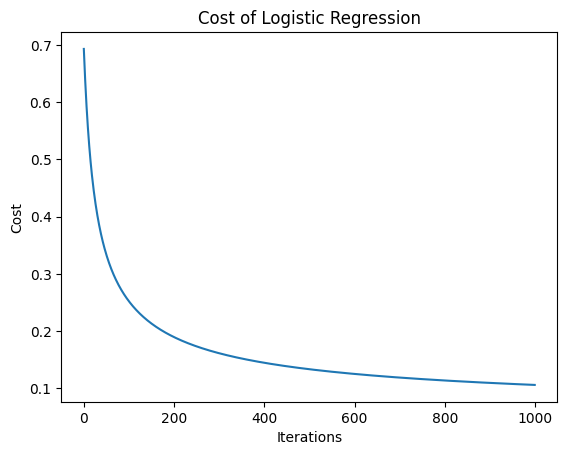

In [89]:
import matplotlib.pyplot as plt

# Assuming y_test and predictions are available
def accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_samples = len(y_true)
    return (correct_predictions / total_samples) * 100

accuracy_score = accuracy(y_test, predictions)
print("Accuracy:", accuracy_score, "%")

# Plot the cost over iterations
plt.plot(range(num_iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost of Logistic Regression')
plt.show()